# Assignment 3

In this assigment, we will work with the *Forest Fire* data set. Please download the data from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/162/forest+fires). Extract the data files into the subdirectory: `../data/fires/` (relative to `./src/`).

## Objective

+ The model objective is to predict the area affected by forest fires given the features set. 
+ The objective of this exercise is to assess your ability to construct and evaluate model pipelines.
+ Please note: the instructions are not meant to be 100% prescriptive, but instead they are a set of minimum requirements. If you find predictive performance gains by applying additional steps, by all means show them. 

## Variable Description

From the description file contained in the archive (`forestfires.names`), we obtain the following variable descriptions:

1. X - x-axis spatial coordinate within the Montesinho park map: 1 to 9
2. Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9
3. month - month of the year: "jan" to "dec" 
4. day - day of the week: "mon" to "sun"
5. FFMC - FFMC index from the FWI system: 18.7 to 96.20
6. DMC - DMC index from the FWI system: 1.1 to 291.3 
7. DC - DC index from the FWI system: 7.9 to 860.6 
8. ISI - ISI index from the FWI system: 0.0 to 56.10
9. temp - temperature in Celsius degrees: 2.2 to 33.30
10. RH - relative humidity in %: 15.0 to 100
11. wind - wind speed in km/h: 0.40 to 9.40 
12. rain - outside rain in mm/m2 : 0.0 to 6.4 
13. area - the burned area of the forest (in ha): 0.00 to 1090.84 









### Specific Tasks

+ Construct four model pipelines, out of combinations of the following components:

    + Preprocessors:

        - A simple processor that only scales numeric variables and recodes categorical variables.
        - A transformation preprocessor that scales numeric variables and applies a non-linear transformation.
    
    + Regressor:

        - A baseline regressor, which could be a [K-nearest neighbours model](https://open.spotify.com/track/4R3AU2pjv8ge2siX1fVbZs?si=b2712f32da0e4358) or a simple [linear regression model](https://scikit-learn.org/stable/modules/linear_model.html)
        - An advanced regressor of your choice (e.g., Random Forest, Neural Network, etc.)

+ Evaluate tune and evaluate each of the four model pipelines. 

    - Select a [performance metric](https://scikit-learn.org/stable/modules/linear_model.html) out of the following options: explained variance, max error, root mean squared error (RMSE), mean absolute error (MAE), r-squared.
    - *TIPS*: 
    
        * Out of the suggested metrics above, [some are correlation metrics, but this is a prediction problem](https://www.tmwr.org/performance#performance). Choose wisely (and don't choose the incorrect options.) 

+ Select the best-performing model and explain its predictions.

    - Provide local explanations.
    - Obtain global explanations and recommend a variable selection strategy.

+ Export your model as a pickle file.


You can work on the Jupyter notebook, as this experiment is fairly short (no need to use sacred). 

# Load the data

Assuming that the files `adult.data` and `adult.test` are in `../data/adult/`, then you can use the code below to load them.

In [6]:
import pandas as pd
columns = [
    'coord_x', 'coord_y', 'month', 'day', 'ffmc', 'dmc', 'dc', 'isi', 'temp', 'rh', 'wind', 'rain', 'area' 
]
fires_dt = (pd.read_csv('../data/fires/forestfires.csv', header = None, names = columns))


# Get X and Y

Create the features data frame and target data.

In [ ]:
from sklearn.model_selection import train_test_split

# Create the features data frame (all columns except 'area)
X = fires_dt.drop('area', axis=1)

# Create the target data (only the 'area' column)
Y = fires_dt['area']

# Perform the train-test split with a 80-20% split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=32)

In [ ]:
# Convert numerical columns to appropriate data types
for col in ['coord_x', 'coord_y', 'ffmc', 'dmc', 'dc', 'isi', 'temp', 'rh', 'wind', 'rain', 'area']:
   fires_dt[col] = pd.to_numeric(fires_dt[col], errors='coerce')


# Identify numerical and categorical columns
numerical_cols = ['coord_x', 'coord_y', 'ffmc', 'dmc', 'dc', 'isi', 'temp', 'rh', 'wind', 'rain']
categorical_cols = ['month', 'day']

# Preprocessing

Create two [Column Transformers](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html), called preproc1 and preproc2, with the following guidelines:

- Numerical variables

    * (Preproc 1 and 2) Scaling: use a scaling method of your choice (Standard, Robust, Min-Max). 
    * Preproc 2 only: 
        
        + Choose a transformation for any of your input variables (or several of them). Evaluate if this transformation is convenient.
        + The choice of scaler is up to you.

- Categorical variables: 
    
    * (Preproc 1 and 2) Apply [one-hot encoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) where appropriate.


+ The only difference between preproc1 and preproc2 is the non-linear transformation of the numerical variables.
    


### Preproc 1

Create preproc1 below.

+ Numeric: scaled variables, no other transforms.
+ Categorical: one-hot encoding.

In [7]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn import set_config
import numpy as np
from sklearn.impute import SimpleImputer

# Preproc 1 -----------------------------------------
# Preprocessing pipeline for numerical features (Standard Scaling for Preproc 1)
numerical_transformer1 = Pipeline(steps=[
   ('scaler', StandardScaler())
])


# Preprocessing pipeline for categorical features (One-Hot Encoding)
categorical_transformer = Pipeline(steps=[
   ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


# Create the ColumnTransformer for Preproc 1
preproc1 = ColumnTransformer(
   transformers=[
       ('num', numerical_transformer1, numerical_cols),
       ('cat', categorical_transformer, categorical_cols)
   ]
)



### Preproc 2

Create preproc1 below.

+ Numeric: scaled variables, non-linear transformation to one or more variables.
+ Categorical: one-hot encoding.

In [8]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PowerTransformer
# Preproc 2 ---------------------------
# Preprocessing pipeline for numerical features (Preproc2)
numerical_transformer2 = Pipeline(steps=[
   ('scaler', StandardScaler()),
   ('power', PowerTransformer(method='yeo-johnson'))
])


# Preprocessing pipeline for categorical features (One-Hot Encoding)
categorical_transformer = Pipeline(steps=[
   ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


# ColumnTransformer for Preproc2
preproc2 = ColumnTransformer(
   transformers=[
       ('num', numerical_transformer2, numerical_cols),
       ('cat', categorical_transformer, categorical_cols)
   ]
)


In [ ]:
# Remove rows with Nan values
X_clean = X.dropna()
Y_clean = Y[X_clean.index]


# Applying the preprocessors
X_preproc1 = preproc1.fit_transform(X_clean)
X_preproc2 = preproc2.fit_transform(X_clean)

## Model Pipeline


Create a [model pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html): 

+ Add a step labelled `preprocessing` and assign the Column Transformer from the previous section.
+ Add a step labelled `regressor` and assign a regression model to it. 

## Regressor

+ Use a regression model to perform a prediction. 

    - Choose a baseline regressor, tune it (if necessary) using grid search, and evaluate it using cross-validation.
    - Choose a more advance regressor, tune it (if necessary) using grid search, and evaluate it using cross-validation.
    - Both model choices are up to you, feel free to experiment.

In [ ]:
from sklearn.linear_model import LinearRegression 

# Regression model (example: Linear Regression)
regressor = LinearRegression()

# pipeline_preprocA ----------------------------------------
# Combine preprocessing and regression into a Pipeline
pipeline_preprocA = Pipeline(steps=[
   ('preprocessing', preproc1),
   ('regressor', regressor)
])

# Display the pipeline diagram for preproc1
set_config(display="diagram")
pipeline_preprocA

In [ ]:
# pipeline_preprocB -----------------------------------------
pipeline_preprocB = Pipeline(steps=[
   ('preprocessing', preproc2),
   ('regressor', regressor)
])

# Display the pipeline diagram for preproc1
set_config(display="diagram")
pipeline_preprocB


In [10]:
# Regression model
regressor = DecisionTreeRegressor()

# pipeline_preprocC ----------------------------------------
# Combine preprocessing and regression into a Pipeline
pipeline_preprocC = Pipeline(steps=[
   ('preprocessing', preproc1),
   ('regressor', regressor)
])


# Display the pipeline diagram for preproc1
set_config(display="diagram")
pipeline_preprocC
C = preproc1 + advanced model


In [9]:
# pipeline_preprocD -----------------------------------------
pipeline_preprocD = Pipeline(steps=[
   ('preprocessing', preproc2),
   ('regressor', regressor)
])

# Display the pipeline diagram for preproc1
set_config(display="diagram")
pipeline_preprocD


# Tune Hyperparams

+ Perform GridSearch on each of the four pipelines. 
+ Tune at least one hyperparameter per pipeline.
+ Experiment with at least four value combinations per pipeline.

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

# pipeline_preproc A Evaluation -------------------------------
# Grid Search for Parameter Tuning
param_grid = {
   'regressor__fit_intercept': [True, False]
}

# Perform Grid Search CV
grid_search = GridSearchCV(pipeline_preprocA, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)
grid_search.fit(X_clean, Y_clean)
print("Best parameters found:", grid_search.best_params_)
print("Best cross-validation score (RMSE):", np.sqrt(-grid_search.best_score_))

# Evaluate with cross-validation
cv_scores = cross_val_score(grid_search.best_estimator_, X_clean, Y_clean, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = np.sqrt(-cv_scores)
print("Cross-validation RMSE scores:", cv_rmse_scores)
print("Mean RMSE:", cv_rmse_scores.mean())

Pipeline_preproc A Evaluation Result:
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Best parameters found: {'regressor__fit_intercept': True}
Best cross-validation score (RMSE): 66.55674468064122
Cross-validation RMSE scores: [ 27.53098144  21.33691721 116.07167972  25.88073879  82.42168928]
Mean RMSE: 54.64840128809867


In [ ]:
# pipeline_preproc B Evaluation -------------------------------
# Grid Search for Parameter Tuning
param_grid = {
   'regressor__fit_intercept': [True, False]
}

# Perform Grid Search CV
grid_search = GridSearchCV(pipeline_preprocB, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)
grid_search.fit(X_clean, Y_clean)
print("Best parameters found:", grid_search.best_params_)
print("Best cross-validation score (RMSE):", np.sqrt(-grid_search.best_score_))

# Evaluate with cross-validation
cv_scores = cross_val_score(grid_search.best_estimator_, X_clean, Y_clean, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = np.sqrt(-cv_scores)
print("Cross-validation RMSE scores:", cv_rmse_scores)
print("Mean RMSE:", cv_rmse_scores.mean())

Pipeline_preproc B Evaluation Result:
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Best parameters found: {'regressor__fit_intercept': True}
Best cross-validation score (RMSE): 67.0838333273364
Cross-validation RMSE scores: [ 32.83048751  25.82364535 116.11731218  24.49428703  81.69027859]
Mean RMSE: 56.191202129728914

In [ ]:
# pipeline_preproc C Evaluation -------------------------------
# Grid Search for Parameter Tuning
param_grid = {
   'regressor__ccp_alpha': [0.0, 0.01, 0.1, 0.2, 0.5]
}

# Perform Grid Search CV
grid_search = GridSearchCV(pipeline_preprocC, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)
grid_search.fit(X_clean, Y_clean)
print("Best parameters found:", grid_search.best_params_)
print("Best cross-validation score (RMSE):", np.sqrt(-grid_search.best_score_))


Pipeline_preproc C Evaluation Result:
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best parameters found: {'regressor__ccp_alpha': 0.1}
Best cross-validation score (RMSE): 76.76248834898554
Cross-validation RMSE scores: [ 62.71030811  48.48987748 119.72278194  45.55621175  98.72050445]
Mean RMSE: 75.03993674651399


In [ ]:
# pipeline_preproc D Evaluation -------------------------------
# Grid Search for Parameter Tuning
param_grid = {
   'regressor__ccp_alpha': [0.0, 0.01, 0.1, 0.2, 0.5]
}

# Perform Grid Search CV
grid_search = GridSearchCV(pipeline_preprocD, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)
grid_search.fit(X_clean, Y_clean)
print("Best parameters found:", grid_search.best_params_)
print("Best cross-validation score (RMSE):", np.sqrt(-grid_search.best_score_))


Pipeline_preproc D Evaluation Result:
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best parameters found: {'regressor__ccp_alpha': 0.2}
Best cross-validation score (RMSE): 75.57386141662559
Cross-validation RMSE scores: [ 57.96926351  40.29760334 119.79802854  46.30282412  88.12164457]
Mean RMSE: 70.49787281566717

# Evaluate

+ Which model has the best performance?

A: 54.64840128809867
B: 56.191202129728914
C: 75.03993674651399
D: 70.49787281566717

Pipeline_preproc A and B generally show lower RMSE scores across all folds compared to Pipeline_preproc C and D. Lower RMSE indicates better predictive performance, suggesting that Pipeline_preproc A and B (linear regression model) performs better in terms of predicting the target variable (lower error) than Pipeline_preproc C and D (DecisionTree model).

Pipeline_preproc A and B have a lower mean RMSE (54.64840128809867) compared to other models (Pipeline_preproc C, D) 
 which further supports that Pipeline_preproc A and B are likely the better-performing models on average across different data folds.

The performance of Pipeline_preproc A and B are similar across different data folds, but Pipeline_preproc A has a lowest mean RMSE and is simplier than Pipeline_preproc B, so Pipeline_preproc A has the best performance.


# Export

+ Save the best performing model to a pickle file.

# Explain

+ Use SHAP values to explain the following only for the best-performing model:

    - Select an observation in your test set and explain which are the most important features that explain that observation's specific prediction.

    - In general, across the complete training set, which features are the most and least important.

+ If you were to remove features from the model, which ones would you remove? Why? How would you test that these features are actually enhancing model performance?

In [ ]:


# Fit the pipeline on training data
pipeline.fit(X_train, Y_train)


# Use SHAP to explain the model's predictions on the test set
explainer = shap.Explainer(pipeline.named_steps['model'], preprocessor.transform(X_train))
shap_values = explainer(preprocessor.transform(X_test))


# Plot the SHAP values
shap.summary_plot(shap_values, preprocessor.transform(X_test), plot_type="bar")

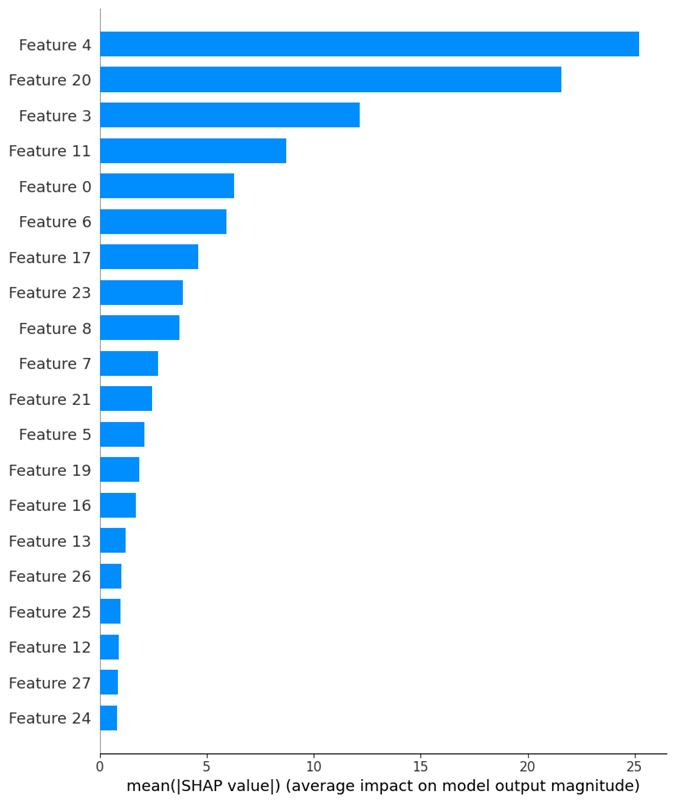

Feature 4 (dc) is the most important and feature 24, 25, 26, 27 (day_sun, day_Thu, day_tue, day_wed) are the least important. 

I will remove the 'day' feature. They have comparatively lower SHAP value than the other features. To testify whether removing the feature enhancing the model performance, I will remove the 'day' feature, and run the training and testing again, and compare the model performance.






*(Answer here.)*

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-3`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_3.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/production/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.

# Reference

Cortez,Paulo and Morais,Anbal. (2008). Forest Fires. UCI Machine Learning Repository. https://doi.org/10.24432/C5D88D.